<a href="https://colab.research.google.com/github/camigenius/Linerar_Regression_Multivariate/blob/master/Regression_Multiple_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://corjusticiacol.org/wp-content/uploads/2019/04/Logo-Los_Libertadores-05.png" alt = "Encabezado MLDS" width = "40%">  </img>

<img src="https://github.com/scipy/scipy.org/blob/main/static/images/logo.svg?raw=true" alt="scipy" width="15%">
<img src="https://www.statsmodels.org/stable/_images/statsmodels-logo-v2-horizontal.svg" alt="statsmodels" width="45%">

# Taller Análisis de Regresión Múltiple
# Especialización en estadística


##**Presentado por:**



*   **Camilo Franco**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import altair as alt
import matplotlib
from scipy import stats
from scipy.stats import pearsonr

In [ ]:
!python --version
print('statsmodels', sm.__version__)
print('Pandas', pd.__version__)
print('NumPy', np.__version__)
print('Matplotlib', matplotlib.__version__)

Python 3.7.15
statsmodels 0.12.2
Pandas 1.3.5
NumPy 1.21.6
Matplotlib 3.2.2


In [ ]:
# El archivco CSV queda en un repositoriode GitHub para que funcione siempre sin necescidad de cargarlo
# cada vez que se requeira correr el modelo
url = "https://raw.githubusercontent.com/camigenius/Linerar_Regression_Multivariate/master/inmuebles_bogota_res.csv"
df= pd.read_csv('https://raw.githubusercontent.com/camigenius/Linerar_Regression_Multivariate/master/inmuebles_bogota_res.csv')


In [ ]:
df.head()

,Unnamed: 0,mtipoinmueble,mvalorventa,marea,mnrocuartos,mnrobanos,mnrogarajes,mzona,mbarrio,mnombrecomunbarrio
0,0,Apartamento,385000000,100.0,3,2,1.0,Chapinero,ALFONSO LOPEZ,GALERIAS
1,1,Apartamento,190810000,34.0,1,2,1.0,Norte,EL CODITO,EL REDIL
2,2,Apartamento,720000000,157.0,3,4,2.0,Noroccidente,NIZA SUBA,Cerros De Niza
3,3,Casa,1018660600,173.0,3,4,1.0,Otros,NaN,NaN
4,4,Apartamento,1850000000,190.0,3,4,2.0,Norte,CERROS DE LOS ALPES,CERROS DE LOS ALPES


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   mtipoinmueble       10000 non-null  object 
 2   mvalorventa         10000 non-null  int64  
 3   marea               10000 non-null  float64
 4   mnrocuartos         9993 non-null   object 
 5   mnrobanos           10000 non-null  object 
 6   mnrogarajes         9945 non-null   float64
 7   mzona               9812 non-null   object 
 8   mbarrio             9945 non-null   object 
 9   mnombrecomunbarrio  9866 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 781.4+ KB


In [ ]:
df.isnull().sum()

Unnamed: 0              0
mtipoinmueble           0
mvalorventa             0
marea                   0
mnrocuartos             7
mnrobanos               0
mnrogarajes            55
mzona                 188
mbarrio                55
mnombrecomunbarrio    134
dtype: int64

In [ ]:
cuartos={'1':1,
         '2':2,
         '3':3,
         '4':4,
         '5':5}

In [ ]:
banos={'1':1,
       '2':2,
       '3':3,
       '4':4,
       '5':5}

In [ ]:
# convertimos variable categóricas en numérica,y que las mismas se conserven como tal
# esto guardando ordinalidad dado que entendiendo nuestra variable a predecir un apto con mas 
#baños, cuartos o garajes si debe influenciar sobre el precio del inmueble
df.mnrocuartos=df.mnrocuartos.map(cuartos)
df.head(3)


,Unnamed: 0,mtipoinmueble,mvalorventa,marea,mnrocuartos,mnrobanos,mnrogarajes,mzona,mbarrio,mnombrecomunbarrio
0,0,Apartamento,385000000,100.0,3.0,2,1.0,Chapinero,ALFONSO LOPEZ,GALERIAS
1,1,Apartamento,190810000,34.0,1.0,2,1.0,Norte,EL CODITO,EL REDIL
2,2,Apartamento,720000000,157.0,3.0,4,2.0,Noroccidente,NIZA SUBA,Cerros De Niza


In [ ]:
df.mnrobanos=df.mnrobanos.map(banos)
df.head(3)

,Unnamed: 0,mtipoinmueble,mvalorventa,marea,mnrocuartos,mnrobanos,mnrogarajes,mzona,mbarrio,mnombrecomunbarrio
0,0,Apartamento,385000000,100.0,3.0,2.0,1.0,Chapinero,ALFONSO LOPEZ,GALERIAS
1,1,Apartamento,190810000,34.0,1.0,2.0,1.0,Norte,EL CODITO,EL REDIL
2,2,Apartamento,720000000,157.0,3.0,4.0,2.0,Noroccidente,NIZA SUBA,Cerros De Niza


In [ ]:
# se elimina columna que no aporta ninguna información
df=df.drop(['Unnamed: 0'], axis=1)
df.head(3)

,mtipoinmueble,mvalorventa,marea,mnrocuartos,mnrobanos,mnrogarajes,mzona,mbarrio,mnombrecomunbarrio
0,Apartamento,385000000,100.0,3.0,2.0,1.0,Chapinero,ALFONSO LOPEZ,GALERIAS
1,Apartamento,190810000,34.0,1.0,2.0,1.0,Norte,EL CODITO,EL REDIL
2,Apartamento,720000000,157.0,3.0,4.0,2.0,Noroccidente,NIZA SUBA,Cerros De Niza


In [ ]:
# se identifican valores Nulos
df.isnull().sum()

mtipoinmueble           0
mvalorventa             0
marea                   0
mnrocuartos            13
mnrobanos             134
mnrogarajes            55
mzona                 188
mbarrio                55
mnombrecomunbarrio    134
dtype: int64

In [ ]:
df.isna().sum()

mtipoinmueble           0
mvalorventa             0
marea                   0
mnrocuartos            13
mnrobanos             134
mnrogarajes            55
mzona                 188
mbarrio                55
mnombrecomunbarrio    134
dtype: int64

In [ ]:
# se evaluan campos con ceros en la variable "área"
(df['marea']==0).value_counts()

False    9049
True      951
Name: marea, dtype: int64

In [ ]:
# Eliminamos registros donde area es igual a cero
df = df.drop(df[df['marea']==0].index)

In [ ]:
df.isnull().sum()

mtipoinmueble           0
mvalorventa             0
marea                   0
mnrocuartos            13
mnrobanos             134
mnrogarajes            55
mzona                 188
mbarrio                55
mnombrecomunbarrio    128
dtype: int64

#1a. Se evalúan las variables categóricas

In [ ]:
df['mzona'].unique()

array(['Chapinero', 'Norte', 'Noroccidente', 'Otros', 'Occidental', nan,
       'Sur', 'Centro', 'Guaymaral'], dtype=object)

In [ ]:
df['mnrogarajes'].unique()

array([ 1.,  2.,  4.,  3.,  0., nan])

In [ ]:
# la varible barrio tiene una cardinalidad demasiado alta , por lo tanto para el presente trabajo la eliminamos 
# de nuestro modelo
df['mbarrio'].unique()

array(['ALFONSO LOPEZ', 'EL CODITO', 'NIZA SUBA', nan,
       'CERROS DE LOS ALPES', 'GILMAR', 'CHICO NORTE III', 'EL REFUGIO',
       'BANCO CENTRAL', 'SAN PATRICIO', 'SUBA NARANJOS', 'CHICO NORTE',
       'LA ESPERANZA NORTE', 'SANTA BARBARA CENTRAL', 'ANTIGUO COUNTRY',
       'CEDRITOS', 'EL SALITRE', 'COLINA CAMPESTRE', 'MOLINOS NORTE',
       'LOS CEDROS', 'VILLA ALSACIA', 'BOSQUE DE PINOS',
       'ILARCO PUENTE LARGO', 'FOLEDO', 'BELLA SUIZA', 'LA ALAMEDA',
       'VENECIA', 'EL RETIRO', 'CIUDAD SALITRE NOR-ORIENTAL',
       'TIERRA LINDA', 'EL PLAN', 'ESTORIL', 'CONTADOR', 'CHICO',
       'EL CEREZO', 'CEDRO MADEIRAS', 'SANTA BARBARA OCCIDENTAL',
       'URBANIZACION BOSQUES DE MEDINA', 'CEDRO NARVAEZ',
       'BOSQUE IZQUIERDO', 'MONACO', 'MARIA CRISTINA',
       'CIUDAD SALITRE SUR-ORIENTAL', 'SAN JOSE DE BAVARIA',
       'EL CASTILLO', 'SAN LUIS', 'MAZUREN', 'ESCUELA DE CARABINEROS',
       'LA ESMERALDA', 'SANTA BARBARA', 'NUEVA ZELANDIA',
       'CASA BLANCA SUBA', 'INGEMA

In [ ]:
#plt.bar(df['mzona'])
valor=df['mzona'].value_counts()
valor

Norte           4587
Noroccidente    2055
Occidental      1056
Chapinero        590
Sur              250
Centro           179
Guaymaral        100
Otros             44
Name: mzona, dtype: int64

## 1b Imputación de variables "Garajes"  y "Cuartos"

In [ ]:
# se imputa por la moda el número de garajes
media = df['mnrogarajes'].median()
df['mnrogarajes'] = df['mnrogarajes'].fillna(media)

In [ ]:
# se imputa por la moda el número de cuaartos
valor=df['mnrocuartos'].mode()
valor

0    3.0
dtype: float64

In [ ]:
moda = df['mnrocuartos'].mode()
df['mnrocuartos'] = df['mnrocuartos'].fillna(3)

In [ ]:
# Eliminamos las filas que contienen valore nulos y no fueron imputados
df=df.dropna()

In [ ]:
df.isnull().sum()

mtipoinmueble         0
mvalorventa           0
marea                 0
mnrocuartos           0
mnrobanos             0
mnrogarajes           0
mzona                 0
mbarrio               0
mnombrecomunbarrio    0
dtype: int64

In [ ]:
# pasamos a un datafraem de 8733 filas y 9 columnas
df.shape

(8543, 9)

In [ ]:
# evaluamos una matriz de correlación y el momento no se ve una relación evidente
corr = df.corr()
corr.style.background_gradient(cmap='viridis')

,mvalorventa,marea,mnrocuartos,mnrobanos,mnrogarajes
mvalorventa,1.000000,0.014401,0.001026,0.042919,0.028308
marea,0.014401,1.000000,0.273315,0.323940,0.281996
mnrocuartos,0.001026,0.273315,1.000000,0.569179,0.341245
mnrobanos,0.042919,0.323940,0.569179,1.000000,0.635479
mnrogarajes,0.028308,0.281996,0.341245,0.635479,1.000000


In [ ]:
# Como mencionamos anteriormente eliminamos las columnas barrio y nombre comun barrio dada
# su alta cardinalidad
df_regresion=df=df.drop(['mbarrio','mnombrecomunbarrio'], axis=1)

In [ ]:
# nuevo data frame, que es que utilizado para crear el modelo
df_regresion.head(3)

,mtipoinmueble,mvalorventa,marea,mnrocuartos,mnrobanos,mnrogarajes,mzona
0,Apartamento,385000000,100.0,3.0,2.0,1.0,Chapinero
1,Apartamento,190810000,34.0,1.0,2.0,1.0,Norte
2,Apartamento,720000000,157.0,3.0,4.0,2.0,Noroccidente


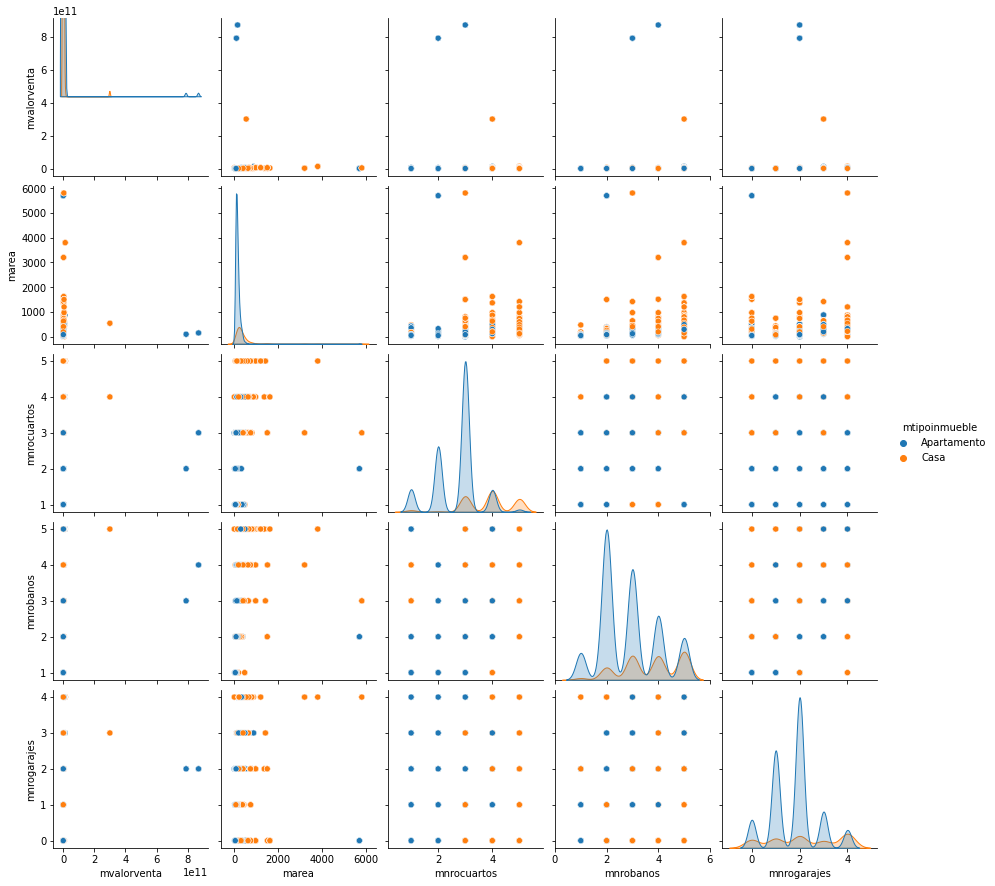

In [ ]:
# Al ejecutar un pairplot no se ve claramente relación entre variables
sns.pairplot(df_regresion,hue='mtipoinmueble')

###Transformacion Logarítmica de las variables área y venta dada
###la escala de los datos que no permiten visualizar gráficamente una relación

In [ ]:
df_regresion['log_marea']=np.log10(df_regresion['marea'])

In [ ]:
df_regresion['log_venta']=np.log10(df_regresion['mvalorventa'])

In [ ]:
df_regresion.head(3)

,mtipoinmueble,mvalorventa,marea,mnrocuartos,mnrobanos,mnrogarajes,mzona,log_marea,log_venta
0,Apartamento,385000000,100.0,3.0,2.0,1.0,Chapinero,2.000000,8.585461
1,Apartamento,190810000,34.0,1.0,2.0,1.0,Norte,1.531479,8.280601
2,Apartamento,720000000,157.0,3.0,4.0,2.0,Noroccidente,2.195900,8.857332


# **2. SUPUESTOS**

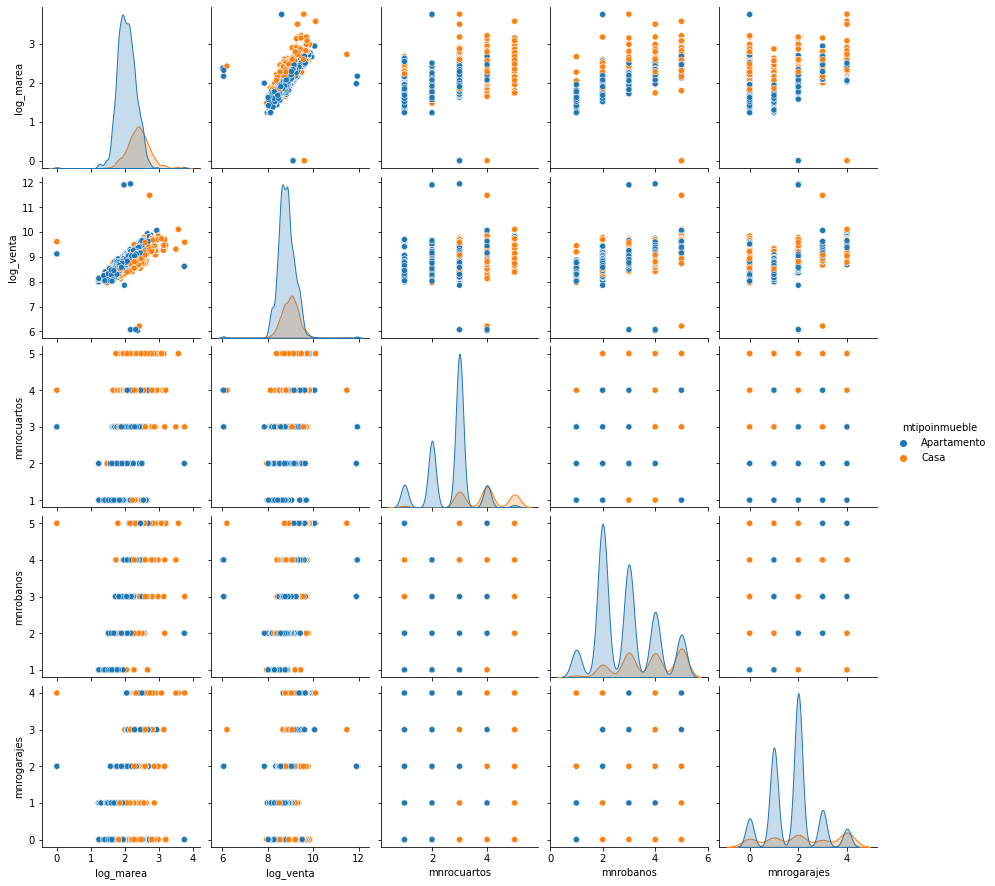

In [ ]:
# En esta gráfica con la tranformacion Logaritmica se empieza a visualizar una relación entre variables
df_pairplot=df_regresion[['log_marea','log_venta','mnrocuartos','mnrobanos','mnrogarajes','mtipoinmueble']]
sns.pairplot(df_pairplot,hue='mtipoinmueble')

# <a id="media">2a. Supuesto de Linealidad</a>

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


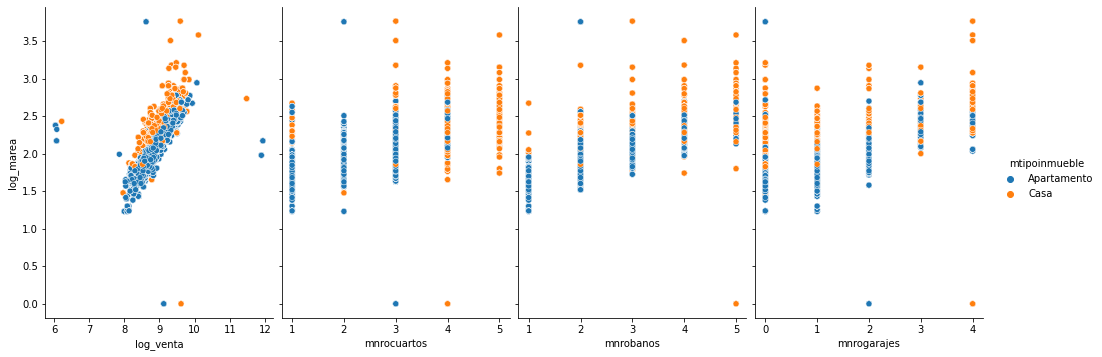

In [ ]:
# Se visualizan valores atípicos (outliers)
p = sns.pairplot(df_regresion, x_vars=['log_venta','mnrocuartos','mnrobanos','mnrogarajes'], y_vars='log_marea', size=5, aspect=0.7,hue='mtipoinmueble')

# **MODELO No 1**

In [ ]:
#Evaluamos un primer modelo 
modelo1=smf.ols(" log_venta ~  log_marea + mnrocuartos + mnrobanos + mnrogarajes", data=df_regresion ).fit()
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_venta   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     3610.
Date:                Fri, 18 Nov 2022   Prob (F-statistic):               0.00
Time:                        01:24:36   Log-Likelihood:                 168.16
No. Observations:                8543   AIC:                            -326.3
Df Residuals:                    8538   BIC:                            -291.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.4205      0.019    381.542      0.000       7.382       7.459
log_marea       0.5577      0.013     44.024      0.000       0.533       0.583
mnrocuartos    -0.0666      0.003    -19.053      0.000      -0.073      -0.060
mnrobanos       0.0949      0.004     26.411      0.000       0.088       0.102
mnrogarajes     0.0867      0.003     27.263      0.000       0.080       0.093
==============================================================================
Omnibus:                     3240.828   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2461121.260
Skew:                           0.104   Prob(JB):                         0.00
Kurtosis:                      86.151   Cond. No.                         47.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Evaluámos valores atípicos para observar si esto mejora el modelo antes de eliminar alguna variable

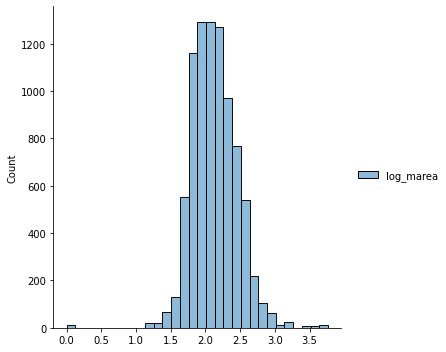

In [ ]:
sns.displot(df_regresion[['log_marea']],bins=30)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


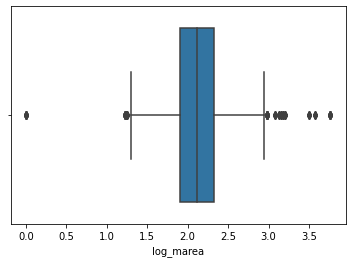

In [ ]:
# se evidencia bastantes valores atípicos
sns.boxplot(df['log_marea'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


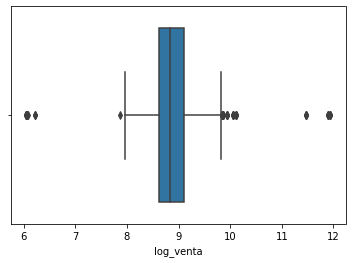

In [ ]:
# se evidencia bastantes valores atípicos
sns.boxplot(df['log_venta'])

In [ ]:
# utilzamos tecnica para eliminar outliers mediante una función que evalua los
# que estan por fuera del rango intercuartílico (Crea unos limites)

# df = es nuestro dataframe
# variable = es la que necesitamos evaluar para eliminar oputliers
# ditance = factor utilizado por lo regular 1.5

def find_boundaries(df, variable, distance):
  IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
  lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
  upper_boundary = df[variable].quantile(0.75)
  return upper_boundary, lower_boundary

In [ ]:
logmarea_upper_limit, logmarea_lower_limit = find_boundaries(df_regresion, 'log_marea', 2)

In [ ]:
logmarea_upper_limit, logmarea_lower_limit

(2.322219294733919, 1.0648313715079925)

In [ ]:
# se crea un vector que identifica con un valor booleano los valores que estan por debajo 
# y por encima de los limites
outliers_Logmarea = np.where(df_regresion['log_marea'] > logmarea_upper_limit, True,
np.where(df_regresion['log_marea'] < logmarea_lower_limit, True,
False))

In [ ]:
# visualizacion del vector
outliers_Logmarea

array([False, False, False, ...,  True, False, False])

In [ ]:
logventa_upper_limit, logventa_lower_limit = find_boundaries(df_regresion, 'log_venta', 2)
logventa_upper_limit, logventa_lower_limit

(9.096910013008056, 7.644531544143094)

In [ ]:
outliers_Logventa = np.where(df_regresion['log_venta'] > logventa_upper_limit, True,
np.where(df_regresion['log_venta'] < logventa_lower_limit, True,
False))

In [ ]:
# df_regresion_trimmed recortada, con tratamiento de outliers
# sigue existiendo sesgo dada la naturaleza de las variables
df_regresion_trimmed = df_regresion.loc[~(outliers_Logmarea+outliers_Logventa)]

In [ ]:
def diagnostic_plots(df, variable):
  plt.figure(figsize=(17,5))
  plt.subplot(1, 3, 1)
  df[variable].hist(bins=30)
  plt.subplot(1, 3, 2)
  stats.probplot(df[variable], dist="norm", plot=plt)
  plt.subplot(1, 3, 3)
  plt.boxplot(df[variable])
  plt.show()

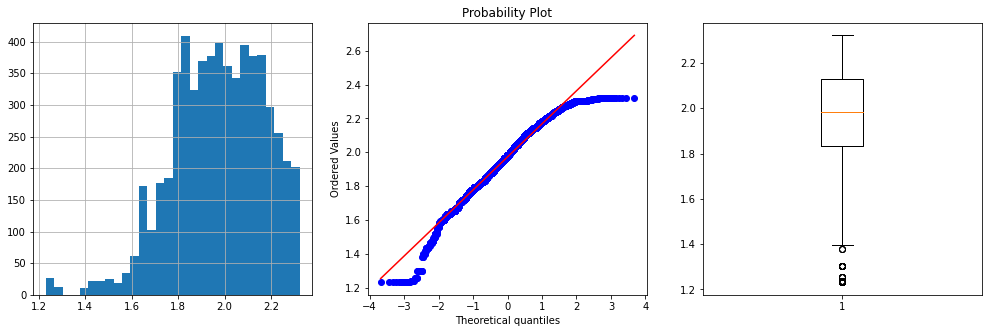

In [ ]:
diagnostic_plots(df_regresion_trimmed, 'log_marea')

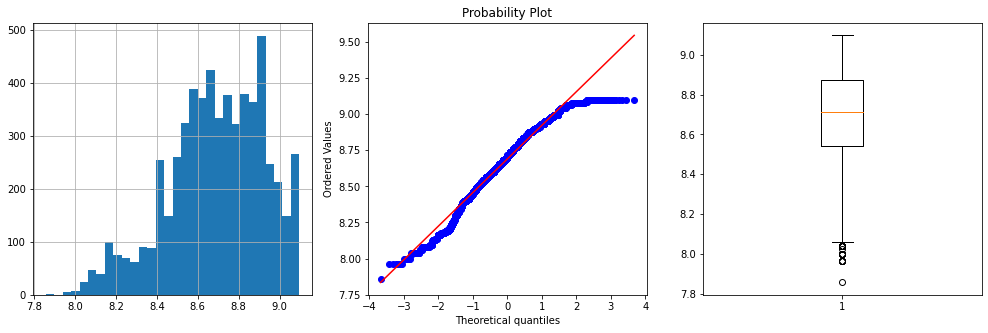

In [ ]:
diagnostic_plots(df_regresion_trimmed, 'log_venta')

In [ ]:
# hubo un recorte importante de datos
df_regresion_trimmed.shape

(5918, 9)

# **MODELO No 2**

In [ ]:
# aunque los ajuste de los datos no son del todo normales el modelo mejoro bastante
# vemos que la variable número de baños "mnrobanos" no parece ser significativa
modelo2=smf.ols(" log_venta ~  log_marea + mnrocuartos + mnrobanos + mnrogarajes", data=df_regresion_trimmed ).fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_venta   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     5885.
Date:                Fri, 18 Nov 2022   Prob (F-statistic):               0.00
Time:                        01:32:09   Log-Likelihood:                 4912.0
No. Observations:                5918   AIC:                            -9814.
Df Residuals:                    5913   BIC:                            -9781.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.0287      0.018    398.443      0.000       6.994       7.063
log_marea       0.8269      0.012     69.707      0.000       0.804       0.850
mnrocuartos    -0.0652      0.002    -32.015      0.000      -0.069      -0.061
mnrobanos       0.0255      0.002     10.813      0.000       0.021       0.030
mnrogarajes     0.0971      0.002     40.151      0.000       0.092       0.102
==============================================================================
Omnibus:                      225.809   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              658.022
Skew:                           0.093   Prob(JB):                    1.30e-143
Kurtosis:                       4.623   Cond. No.                         71.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **MODELO No 3**

In [ ]:
modelo3=smf.ols(" log_venta ~  log_marea + mnrocuartos", data=df_regresion_trimmed ).fit()
modelo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_venta   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     7970.
Date:                Fri, 18 Nov 2022   Prob (F-statistic):               0.00
Time:                        01:35:47   Log-Likelihood:                 4028.3
No. Observations:                5918   AIC:                            -8051.
Df Residuals:                    5915   BIC:                            -8031.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.6190      0.017    400.964      0.000       6.587       6.651
log_marea       1.1662      0.010    122.139      0.000       1.147       1.185
mnrocuartos    -0.0860      0.002    -38.494      0.000      -0.090      -0.082
==============================================================================
Omnibus:                      444.746   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1273.686
Skew:                          -0.402   Prob(JB):                    2.65e-277
Kurtosis:                       5.126   Cond. No.                         42.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
modelo3=smf.ols(" log_venta ~  log_marea + mnrobanos +mnrogarajes", data=df_regresion_trimmed ).fit()
modelo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_venta   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     6010.
Date:                Fri, 18 Nov 2022   Prob (F-statistic):               0.00
Time:                        01:35:19   Log-Likelihood:                 3443.6
No. Observations:                5918   AIC:                            -6881.
Df Residuals:                    5915   BIC:                            -6861.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9252      0.021    326.610      0.000       6.884       6.967
log_marea      0.8478      0.013     64.295      0.000       0.822       0.874
mnrobanos      0.0363      0.003     12.470      0.000       0.031       0.042
==============================================================================
Omnibus:                      138.877   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.426
Skew:                          -0.310   Prob(JB):                     9.83e-38
Kurtosis:                       3.554   Cond. No.                         49.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# <a id="media">2b. Media de residuos</a>

In [ ]:
def residuales(modelo):
  residuales=modelo.resid
  media_residuos=residuales.mean()
  return print(f'La media de los residuos para el modelo es {media_residuos}')

In [ ]:
# la media de los residuos es cercana a 0
residuales(modelo2)

La media de los residuos para el modelo es 5.778112395818658e-16


In [ ]:
# no son altos los residuales del modelo 4
residuales_modelo2=modelo2.resid
residuales_modelo2.mean()
residuales_modelo2.sort_values().head(10)

9977   -0.867541
6632   -0.404960
7052   -0.404960
6422   -0.404960
7262   -0.404960
6212   -0.404960
6842   -0.404960
5559   -0.298719
5349   -0.298719
4719   -0.298719
dtype: float64

# <a id="homo">2c. Supuesto de Homocedasticidad</a>

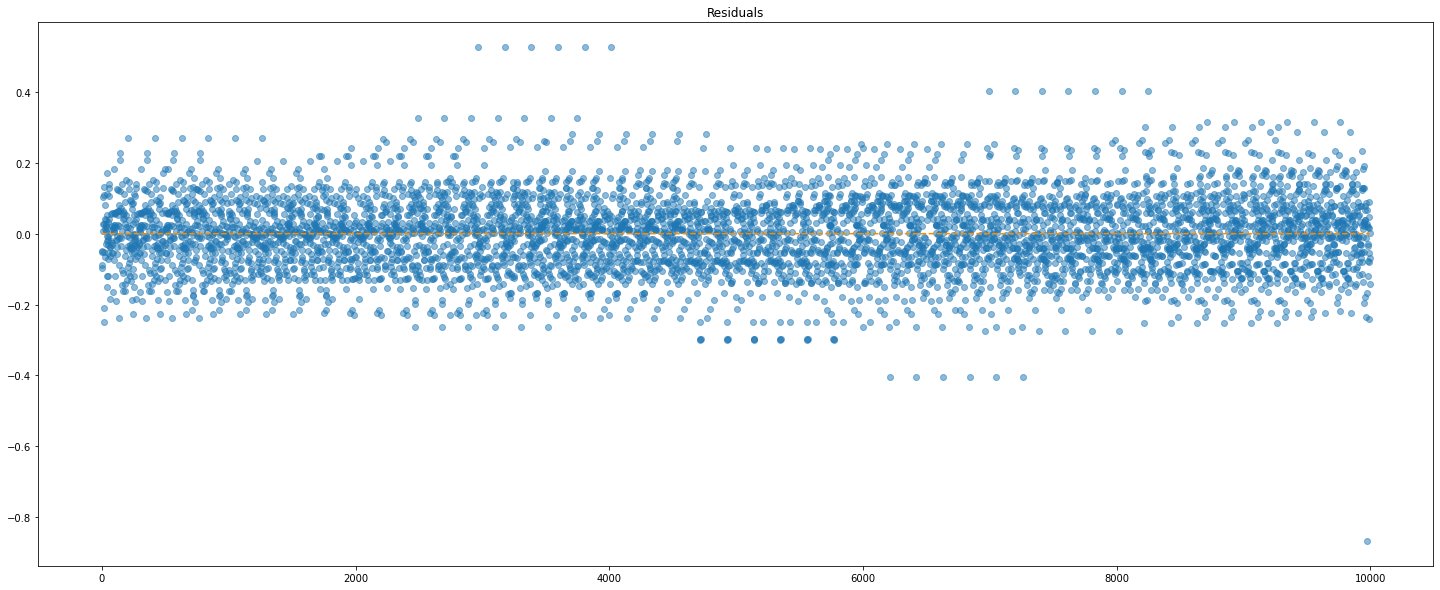

In [ ]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(25, 10))
ax = plt.subplot(111)  
plt.scatter(x=residuales_modelo2.index, y=residuales_modelo2, alpha=0.5)
plt.plot(np.repeat(0,residuales_modelo2.index.max()), color='darkorange', linestyle='--')
plt.title('Residuals')
plt.show()

In [ ]:
import statsmodels.stats.api as sms
def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')


 Breusch-Pagan test ----
                                      value
Lagrange multiplier statistic  9.956036e+01
p-value                        1.220219e-20
f-value                        2.529460e+01
f p-value                      8.328743e-21

 Goldfeld-Quandt test ----
                value
F statistic  1.169642
p-value      0.000010

 Residuals plots ----


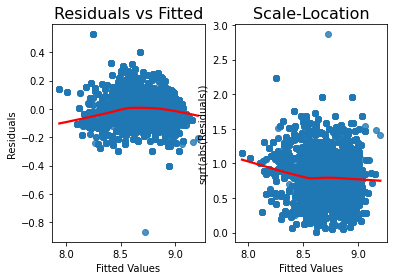

In [ ]:
homoscedasticity_test(modelo2)

# <a id="normal">2d. Comprobar la normalidad de los términos/residuales de error</a>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


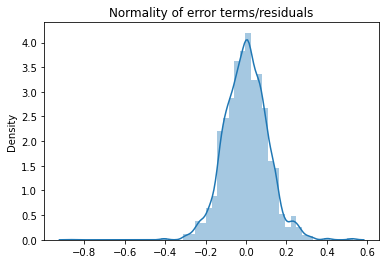

In [ ]:
# la distribución de los errores tiene una apariencia de normalidad

p = sns.distplot(residuales_modelo2,kde=True)
p = plt.title('Normality of error terms/residuals')

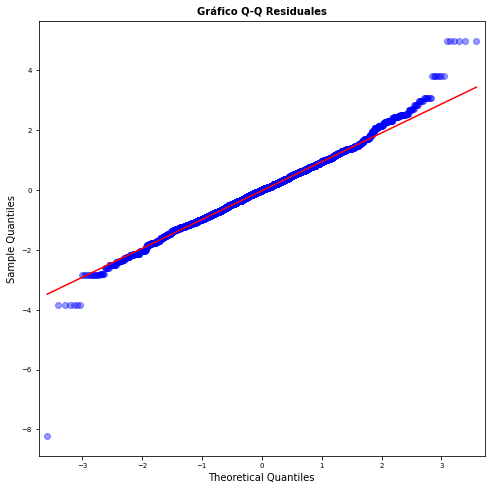

In [ ]:
import statsmodels.api as sm
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(8,8))
sm.qqplot(
    residuales_modelo2,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q Residuales', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

In [ ]:
from scipy import stats

# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(residuales_modelo2)
shapiro_test

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9898761510848999, pvalue=3.459070281361866e-20)

## <a id="auto">2e. Sin autocorrelación de residuos</a>

<Figure size 1440x1440 with 0 Axes>

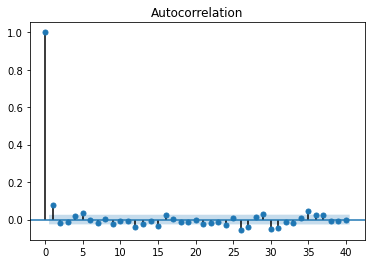

In [ ]:
# el Durbin-Watson:	1.950 para nuestro MODELO 4 , nos indica que no hay autocorrelación dado que se aproxíma a 2


import statsmodels.tsa.api as smt

plt.figure(figsize=(20,20))  
acf = smt.graphics.plot_acf(modelo2.resid, lags=40 , alpha=0.05)
acf.show()

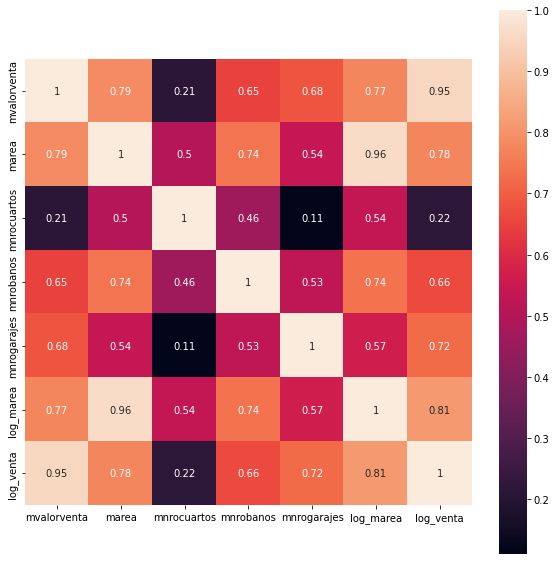

In [ ]:
# No existe al evaluar graficamente con la matriz de correlación Multicolinealidad entre las varibles
# para nuestro caso "log_marea" y "mnrogarajes"
plt.figure(figsize=(10,10))  
p=sns.heatmap(df_regresion_trimmed.corr(), annot=True,square=True)

In [ ]:
df_regresion_trimmed.columns

Index(['mtipoinmueble', 'mvalorventa', 'marea', 'mnrocuartos', 'mnrobanos',
       'mnrogarajes', 'mzona', 'log_marea', 'log_venta'],
      dtype='object')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X= df_regresion_trimmed[['mnrocuartos', 'mnrobanos','mnrogarajes','log_marea']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  

print(vif_data)

       feature        VIF
0  mnrocuartos  16.280426
1    mnrobanos  17.946986
2  mnrogarajes   7.277997
3    log_marea  25.302473


In [ ]:
coeficientes=modelo2.params
coeficientes

Intercept      7.028750
log_marea      0.826929
mnrocuartos   -0.065229
mnrobanos      0.025490
mnrogarajes    0.097114
dtype: float64

In [ ]:
type(coeficientes)

pandas.core.series.Series

In [ ]:
coef_bo=coeficientes[0]
coef_b1=coeficientes[1]
coef_b2=coeficientes[2]
coef_b3=coeficientes[3]
coef_b4=coeficientes[4]

In [ ]:
def y_estimado_log(area,habitaciones,banos,garajes):
     area=area
     y_estimado=(10**coef_bo)*(area**coef_b1)*(habitaciones**coef_b2)*(banos**coef_b3)*(garajes**coef_b4)
     imprime=print(f'El valor estimado del Inmuelbe para un área {area }  mts cuadrados es de :$ {round(y_estimado,0)}') 
     imprime2=print('************************************************************************')
     #imprime3=print(f'Modelo : Valor_venta = 10 ^ {round(coef_bo,2)} * {area} ^ {round(coef_b1,2)} ')
     return imprime ,imprime2

In [ ]:
y_estimado_log(200,5,4,1)

El valor estimado del Inmuelbe para un área 200  mts cuadrados es de :$ 796695857.0
************************************************************************


(None, None)